In [2]:
import math
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns 
sns.set()

# Research proposal

This research proposal will compare the trends in border crossing from Mexico and Canada into the US over nearly a two decade period from 2000-2019. The objective will be to understand the modes of crossing uncover annual patterns in traffic and whether these modes and patterns have changed over time and how they might have changed.

The data used for this analysis comes from the US Bureau of Transportation. Below is an overview of the land border crossing ports along the US-Canada and US-Mexico borders.

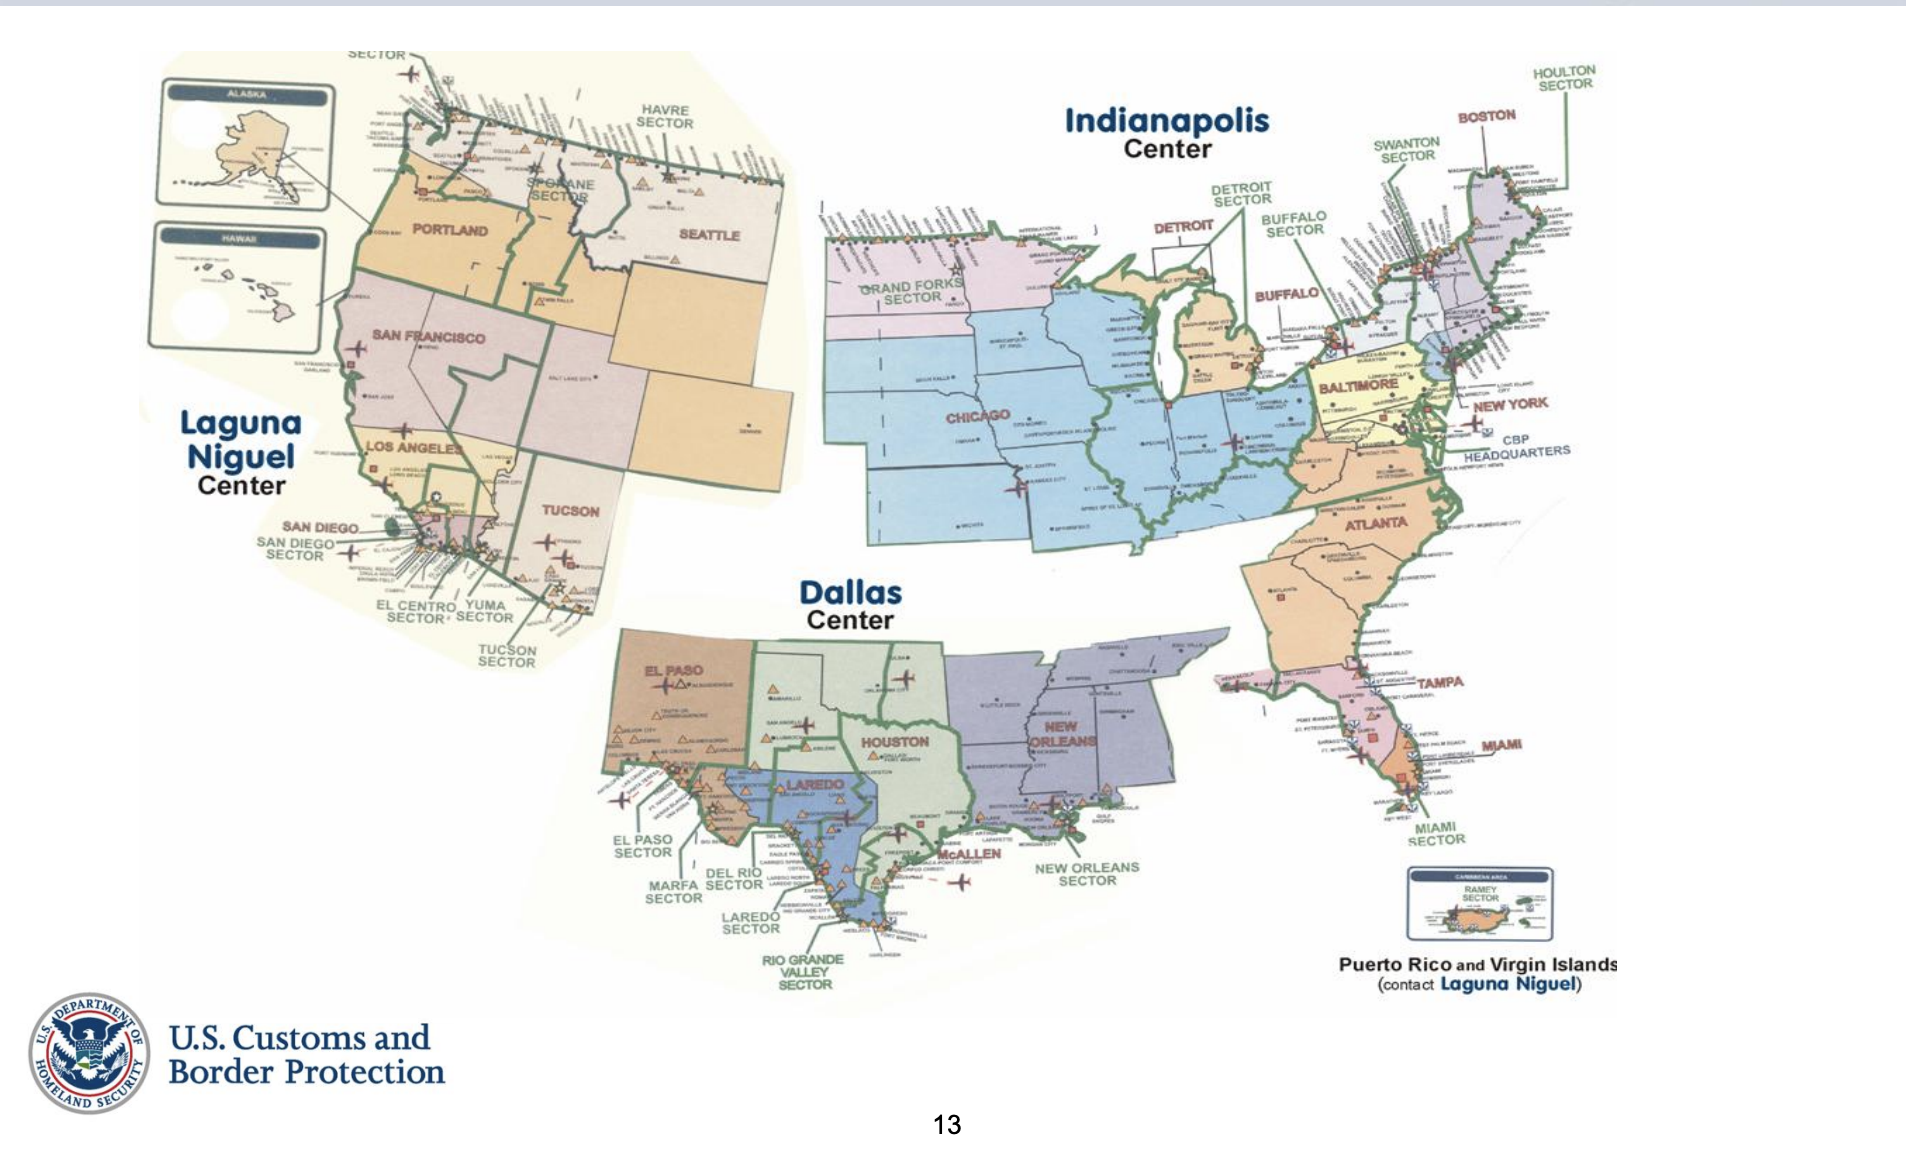

# Data set assembly

About the dataset:\
This data file contains whole data from January 1996 to February 2020 of the total incoming crossing counts into the US. This file contains 7 columns specifying the port and its unique code, the border, the mode of vehicle used, number of people crossing the border into the US, the date and time of crossing, the state in which they entered.

https://www.kaggle.com/divyansh22/us-border-crossing-data



Column info:

Port Name.....Name of the port from which the border is crossed\
State.........State\
Port Code.....Unique port code\
Border........US-Canada or US-Mexico\
Date..........Date of crossing the border\
Measure.......Mode of transportation.\
Value.........Counts of people crossing

In [3]:
# Queried US Customs and border patrol (from Kaggle)

dfbcraw = pd.read_csv('https://raw.githubusercontent.com/robholmstrom/Sams_github/master/Capstone_1/Bordercrossing/Border_Crossing_Entry_Data.csv')
print(dfbcraw.info())

pd.set_option('display.max_rows', 9000)
dfbcraw.head(9000)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355511 entries, 0 to 355510
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Port Name  355511 non-null  object
 1   State      355511 non-null  object
 2   Port Code  355511 non-null  int64 
 3   Border     355511 non-null  object
 4   Date       355511 non-null  object
 5   Measure    355511 non-null  object
 6   Value      355511 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 19.0+ MB
None


Port Name State  Port Code            Border  \
0                          Alcan    AK       3104  US-Canada Border   
1                          Alcan    AK       3104  US-Canada Border   
2                          Alcan    AK       3104  US-Canada Border   
3                          Alcan    AK       3104  US-Canada Border   
4                          Alcan    AK       3104  US-Canada Border   
5                 Alexandria Bay    NY        708  US-Canada Border   
6                 Alexandria Bay    NY        708  US-Canada Border   
7                 Alexandria Bay    NY        708  US-Canada Border   
8                 Alexandria Bay    NY        708  US-Canada Border   
9                 Alexandria Bay    NY        708  US-Canada Border   
10                Alexandria Bay    NY        708  US-Canada Border   
11                Alexandria Bay    NY        708  US-Canada Border   
12                       Algonac    MI       3814  US-Canada Border   
13                       Algonac    MI       3814  US-Canada Border   
14                       Ambrose    ND       3410  US-Canada Border   
15                       Ambrose    ND       3410  US-Canada Border   
16                       Ambrose    ND       3410  US-Canada Border   
17                       Ambrose    ND       3410  US-Canada Border   
18                       Andrade    CA       2502  US-Mexico Border   
19                       Andrade    CA       2502  US-Mexico Border   
20                       Andrade    CA       2502  US-Mexico Border   
21                        Antler    ND       3413  US-Canada Border   
22                        Antler    ND       3413  US-Canada Border   
23                        Antler    ND       3413  US-Canada Border   
24                        Antler    ND       3413  US-Canada Border   
25                      Baudette    MN       3424  US-Canada Border   
26                      Baudette    MN       3424  US-Canada Border   
27                      Baudette    MN       3424  US-Canada Border   
28                      Baudette    MN       3424  US-Canada Border   
29                      Baudette    MN       3424  US-Canada Border   
30                      Baudette    MN       3424  US-Canada Border   
31                      Baudette    MN       3424  US-Canada Border   
32                      Baudette    MN       3424  US-Canada Border   
33                 Beecher Falls    VT        206  US-Canada Border   
34                 Beecher Falls    VT        206  US-Canada Border   
35                 Beecher Falls    VT        206  US-Canada Border   
36                 Beecher Falls    VT        206  US-Canada Border   
37                 Beecher Falls    VT        206  US-Canada Border   
38                        Blaine    WA       3004  US-Canada Border   
39                        Blaine    WA       3004  US-Canada Border   
40                        Blaine    WA       3004  US-Canada Border   
41                        Blaine    WA       3004  US-Canada Border   
42                        Blaine    WA       3004  US-Canada Border   
43                        Blaine    WA       3004  US-Canada Border   
44                        Blaine    WA       3004  US-Canada Border   
45                        Blaine    WA       3004  US-Canada Border   
46                        Blaine    WA       3004  US-Canada Border   
47                        Blaine    WA       3004  US-Canada Border   
48                        Blaine    WA       3004  US-Canada Border   
49                     Boquillas    TX       2410  US-Mexico Border   
50                      Boundary    WA       3015  US-Canada Border   
51                      Boundary    WA       3015  US-Canada Border   
52                      Boundary    WA       3015  US-Canada Border   
53                      Boundary    WA       3015  US-Canada Border   
54                      Boundary    WA       3015  US-Canada Border   
55                      Boundary    WA       30

In [5]:
# Will focus on border crossing events in 2000, 2010, and 2020 to look for trends
# Will also make a column that gives just the year in place of a specific time stamp

# Create a list with respective year value for each detailed timestamp
dfbcraw['Date'].count()
year = []
for x in range(dfbcraw['Date'].count()): # Extract the last two digits of the year and adds a 20 to the beginning
    pos = dfbcraw['Date'][x].index(' ')
    date = int('20'+ (dfbcraw['Date'][x][0:pos])[-2:len((dfbcraw['Date'][x][0:pos]))])
    year.append(date)

# Add a year column to table for each event logged
dfbcraw['Year'] = year

#Limit data to the years within 2000-2019 since the 1990s data years will be messed up
dfbcallcross = dfbcraw[dfbcraw['Year'] < 2020]


# Check only desired years are in the columns
print(np.unique(dfbcallcross['Year']))





[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019]


In [51]:
# Focus crossing events that include passenger and pedestrian transportation:
print(np.unique(dfbcallcross['Measure']))

dfbc = dfbcallcross.iloc[(dfbcallcross['Measure'].isin(['Bus Passengers', 'Personal Vehicle Passengers', 'Train Passengers'])).values]
dfbc


['Bus Passengers' 'Buses' 'Pedestrians' 'Personal Vehicle Passengers'
 'Personal Vehicles' 'Rail Containers Empty' 'Rail Containers Full'
 'Train Passengers' 'Trains' 'Truck Containers Empty'
 'Truck Containers Full' 'Trucks']


Port Name State  Port Code            Border  \
1549           Alexandria Bay    NY        708  US-Canada Border   
1550                 Baudette    MN       3424  US-Canada Border   
1551                   Blaine    WA       3004  US-Canada Border   
1552              Brownsville    TX       2301  US-Mexico Border   
1553    Buffalo-Niagara Falls    NY        901  US-Canada Border   
...                       ...   ...        ...               ...   
296139                 Laredo    TX       2304  US-Mexico Border   
296145                 Lynden    WA       3023  US-Canada Border   
296148                 Norton    VT        211  US-Canada Border   
296150            Trout River    NY        715  US-Canada Border   
296162                Hidalgo    TX       2305  US-Mexico Border   

                 Date                      Measure    Value  Year  
1549    12/1/19 00:00               Bus Passengers      740  2019  
1550    12/1/19 00:00               Bus Passengers       83  2019  
1551    12/1/19 00:00               Bus Passengers    17029  2019  
1552    12/1/19 00:00               Bus Passengers     4668  2019  
1553    12/1/19 00:00               Bus Passengers     9910  2019  
...               ...                          ...      ...   ...  
296139   1/1/00 00:00  Personal Vehicle Passengers  1488330  2000  
296145   1/1/00 00:00               Bus Passengers      220  2000  
296148   1/1/00 00:00             Train Passengers       66  2000  
296150   1/1/00 00:00  Personal Vehicle Passengers    33267  2000  
296162   1/1/00 00:00  Personal Vehicle Passengers  1819263  2000  

[73583 rows x 8 columns]

# Data exploration

In [7]:

dfbccan = dfbc.loc[(dfbc['Border'] == 'US-Canada Border')].groupby(['Measure', 'Border']).sum().sort_values(['Border','Value'])
dfbcmex = dfbc.loc[(dfbc['Border'] == 'US-Mexico Border')].groupby(['Measure', 'Border']).sum().sort_values(['Border','Value'])
dfcmgroup = pd.merge(dfbccan, dfbcmex, on = 'Measure', suffixes = [' US-Canada Border', ' US-Mexico Border']).reset_index()
dfcmgroup

dfcmgroup


Measure  Port Code US-Canada Border  \
0             Train Passengers                    43435092   
1               Bus Passengers                    46160831   
2  Personal Vehicle Passengers                    49867845   

   Value US-Canada Border  Year US-Canada Border  Port Code US-Mexico Border  \
0                 5200843               35679997                    12629082   
1                59469949               37659195                    13876098   
2              1208993712               40617466                    14720410   

   Value US-Mexico Border  Year US-Mexico Border  
0                  243251               10366065  
1                57944550               11403181  
2              3168186295               12101349

In [8]:
dfbc.groupby(['Border']).sum().reset_index()

Border  Port Code       Value       Year
0  US-Canada Border  139463768  1273664504  113956658
1  US-Mexico Border   41225590  3226374096   33870595

In [9]:
dfbc.groupby(['Border']).count().reset_index()

Border  Port Name  State  Port Code   Date  Measure  Value   Year
0  US-Canada Border      56723  56723      56723  56723    56723  56723  56723
1  US-Mexico Border      16860  16860      16860  16860    16860  16860  16860

In [10]:
# Will calculate the 
# .assign() allow a calculation to be made as such:

# players_df = players_df.assign(bmi = (703 * players_df.weight) / (players_df.height**2))
# players_df.head()

In [11]:
# Example of how to pivot a table and set column names:
# df
#     foo   bar  baz  zoo
# 0   one   A    1    x
# 1   one   B    2    y
# 2   one   C    3    z
# 3   two   A    4    q
# 4   two   B    5    w
# 5   two   C    6    t

# df.pivot(index='foo', columns='bar', values=['baz', 'zoo'])
#       baz       zoo
# bar   A  B  C   A  B  C
# foo
# one   1  2  3   x  y  z
# two   4  5  6   q  w  t

# Data analysis

In [53]:
#'Bus Passengers','Pedestrians', 'Personal Vehicle Passengers', 'Train Passengers'
dfmbp = dfbc.loc[(dfbc['Measure']=='Bus Passengers') &(dfbc['Year'].isin([2000,2019])) & (dfbc['Border']== 'US-Mexico Border')]
dfcbp = dfbc.loc[(dfbc['Measure']=='Bus Passengers') &(dfbc['Year'].isin([2000,2019])) & (dfbc['Border']== 'US-Canada Border')]
dfmp = dfbc.loc[(dfbc['Measure']=='Pedestrians') &(dfbc['Year'].isin([2000,2019])) & (dfbc['Border']== 'US-Mexico Border')]
dfcp = dfbc.loc[(dfbc['Measure']=='Pedestrians') &(dfbc['Year'].isin([2000,2019])) & (dfbc['Border']== 'US-Canada Border')]
dfmpv = dfbc.loc[(dfbc['Measure']=='Personal Vehicle Passengers') &(dfbc['Year'].isin([2000,2019])) & (dfbc['Border']== 'US-Mexico Border')]
dfcpv = dfbc.loc[(dfbc['Measure']=='Personal Vehicle Passengers') &(dfbc['Year'].isin([2000,2019])) & (dfbc['Border']== 'US-Canada Border')]
dfmtp = dfbc.loc[(dfbc['Measure']=='Train Passengers') &(dfbc['Year'].isin([2000,2019])) & (dfbc['Border']== 'US-Mexico Border')]
dfctp = dfbc.loc[(dfbc['Measure']=='Train Passengers') &(dfbc['Year'].isin([2000,2019])) & (dfbc['Border']== 'US-Canada Border')]






Text(0.5, 1.0, 'Mexico Bus Passengers')

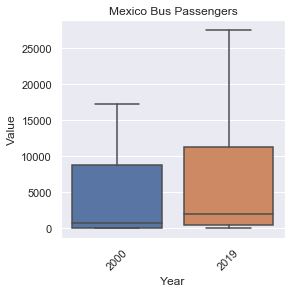

In [54]:
plt.figure(figsize=(4,4))
plt.xticks(rotation=45)
sns.boxplot('Year', 'Value', data = dfmbp,  showfliers = False).set_title('Mexico Bus Passengers')

Text(0.5, 1.0, 'Canada Bus Passengers')

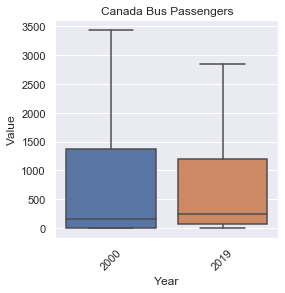

In [55]:
plt.figure(figsize=(4,4))
plt.xticks(rotation=45)
sns.boxplot('Year', 'Value', data = dfcbp,  showfliers = False).set_title('Canada Bus Passengers')

Text(0.5, 1.0, 'Mexico Vehicle Passengers')

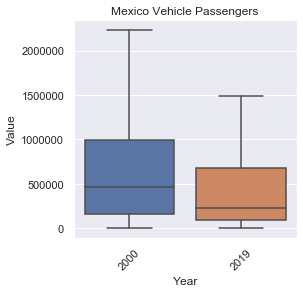

In [27]:
plt.figure(figsize=(4,4))
plt.xticks(rotation=45)


sns.boxplot('Year', 'Value', data = df00mpv, showfliers = False).set_title('Mexico Vehicle Passengers')


Text(0.5, 1.0, 'Canada Vehicle Passengers')

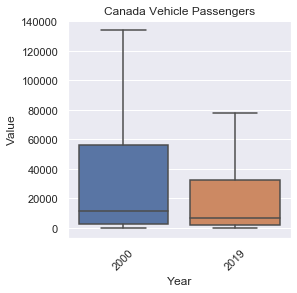

In [46]:
plt.figure(figsize=(4,4))
plt.xticks(rotation=45)


sns.boxplot('Year', 'Value', data = df00cpv, showfliers = False).set_title('Canada Vehicle Passengers')


Text(0.5, 1.0, 'Mexico Train Passengers')

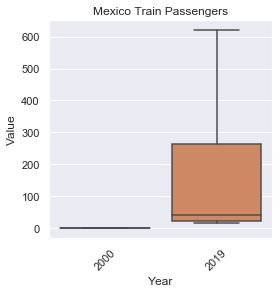

In [29]:
plt.figure(figsize=(4,4))
plt.xticks(rotation=45)

sns.boxplot('Year', 'Value', data = df00mtp, showfliers = False).set_title('Mexico Train Passengers')


Text(0.5, 1.0, 'Canada Train Passengers')

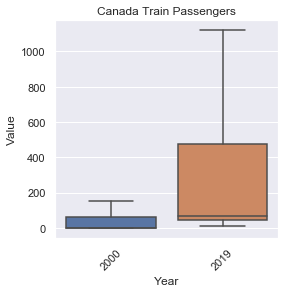

In [30]:
plt.figure(figsize=(4,4))
plt.xticks(rotation=45)

sns.boxplot('Year', 'Value', data = df00ctp, showfliers = False).set_title('Canada Train Passengers')


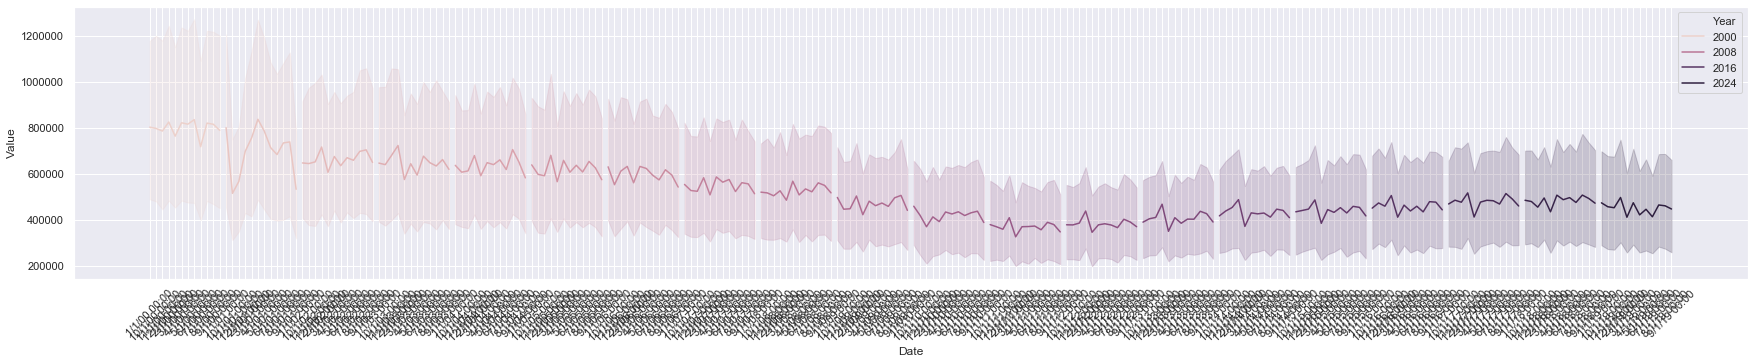

In [34]:
dfmexvp = dfbc.loc[(dfbc['Year'] > 1999) & (dfbc['Year'] < 2020) & (dfbc['Border'] == 'US-Mexico Border') & (dfbc['Measure'] == 'Personal Vehicle Passengers')]
dfcanvp = dfbc.loc[(dfbc['Year'] > 1999) & (dfbc['Year'] < 2020) & (dfbc['Border'] == 'US-Canada Border') & (dfbc['Measure'] == 'Personal Vehicle Passengers')]

plt.figure(figsize=(30,5))
plt.xticks(rotation=45)
sns.lineplot('Date', 'Value', hue = 'Year', data = dfmexvp)
#sns.lineplot('Date', 'Value', hue = 'Year', data = dfcanvp)


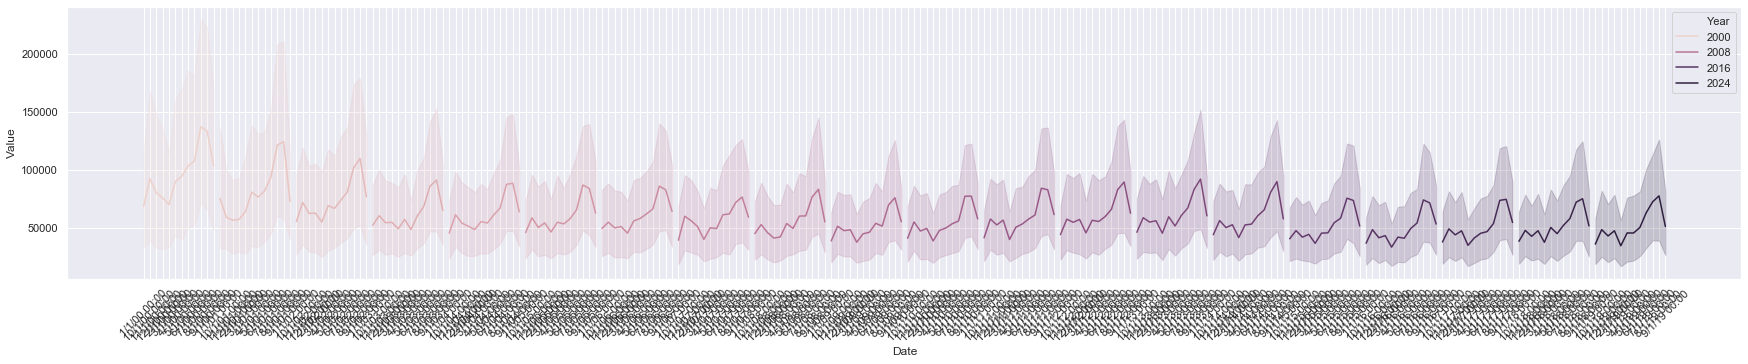

In [35]:
plt.figure(figsize=(30,5))
plt.xticks(rotation=45)
sns.lineplot('Date', 'Value', hue = 'Year', data = dfcanvp)

(array([163.,  32.,  40.,  41.,   3.,   4.,   5.,   4.,   7.,   4.]),
 array([   3241. ,  249951.6,  496662.2,  743372.8,  990083.4, 1236794. ,
        1483504.6, 1730215.2, 1976925.8, 2223636.4, 2470347. ]),
 <a list of 10 Patch objects>)

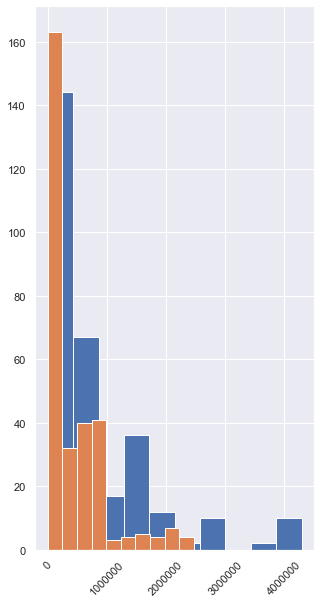

In [36]:
dfmex00and19vp = dfbc.loc[(dfbc['Year'].isin([2000, 2019])) & (dfbc['Border'] == 'US-Mexico Border') & (dfbc['Measure'] == 'Personal Vehicle Passengers')]

mexvp2000 = dfmex00and19vp.loc[(dfmex00and19vp['Year']== 2000),'Value']
mexvp2019 = dfmex00and19vp.loc[(dfmex00and19vp['Year']== 2019),'Value']

plt.figure(figsize=(5,10))
plt.xticks(rotation=45)
#
plt.hist(mexvp2000)
plt.hist(mexvp2019)

(array([930.,  29.,   4.,  12.,  13.,   8.,   2.,   0.,   0.,   2.]),
 array([7.0000000e+00, 1.4539970e+05, 2.9079240e+05, 4.3618510e+05,
        5.8157780e+05, 7.2697050e+05, 8.7236320e+05, 1.0177559e+06,
        1.1631486e+06, 1.3085413e+06, 1.4539340e+06]),
 <a list of 10 Patch objects>)

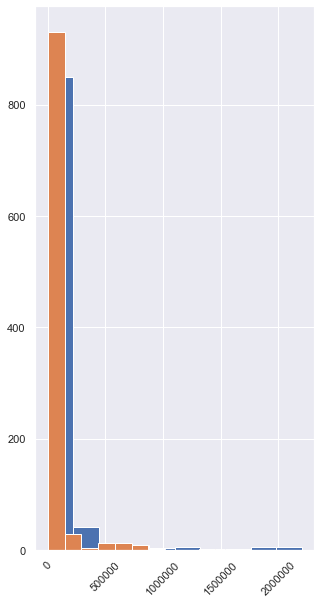

In [59]:
dfcan00and19vp = dfbc.loc[(dfbc['Year'].isin([2000, 2019])) & (dfbc['Border'] == 'US-Canada Border') & (dfbc['Measure'] == 'Personal Vehicle Passengers')]

canvp2000 = dfcan00and19vp.loc[(dfcan00and19vp['Year']== 2000),'Value']
canvp2019 = dfcan00and19vp.loc[(dfcan00and19vp['Year']== 2019),'Value']

plt.figure(figsize=(5,10))
plt.xticks(rotation=45)
#
plt.hist(canvp2000)
plt.hist(canvp2019)

In [60]:
stats.kruskal(canvp2000,canvp2019)

KruskalResult(statistic=32.779357487985074, pvalue=1.0323532387146151e-08)

pandas.core.series.Series

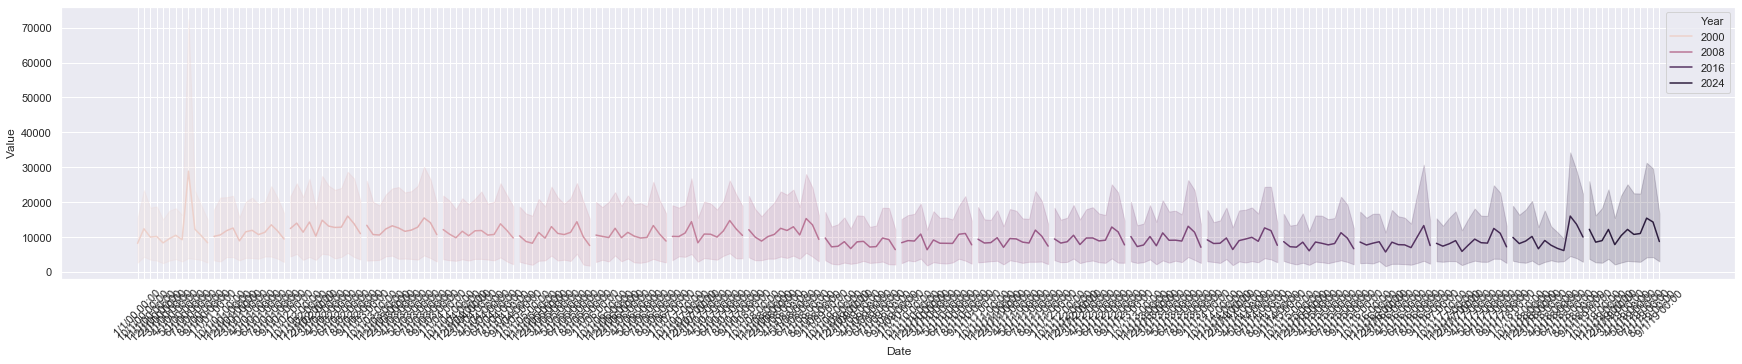

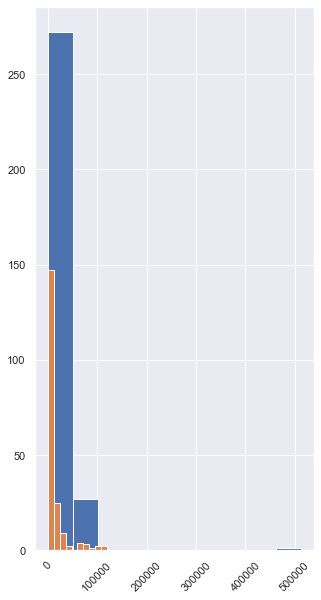

In [73]:
dfmex00and19bp = dfbc.loc[(dfbc['Year'].isin([2000, 2019])) & (dfbc['Border'] == 'US-Mexico Border') & (dfbc['Measure'] == 'Bus Passengers')]


dfmexbp = dfbc.loc[(dfbc['Year'] > 1999) & (dfbc['Year'] < 2020) & (dfbc['Border'] == 'US-Mexico Border') & (dfbc['Measure'] == 'Bus Passengers')]
dfcanbp = dfbc.loc[(dfbc['Year'] > 1999) & (dfbc['Year'] < 2020) & (dfbc['Border'] == 'US-Canada Border') & (dfbc['Measure'] == 'Bus Passengers')]

plt.figure(figsize=(30,5))
plt.xticks(rotation=45)
sns.lineplot('Date', 'Value', hue = 'Year', data = dfmexbp)
#sns.lineplot('Date', 'Value', hue = 'Year', data = dfcanvp)

dfmex00and19bp = dfbc.loc[(dfbc['Year'].isin([2000, 2019])) & (dfbc['Border'] == 'US-Mexico Border') & (dfbc['Measure'] == 'Bus Passengers')]

mexbp2000 = dfmex00and19bp.loc[(dfmex00and19bp['Year']== 2000),'Value']
mexbp2019 = dfmex00and19bp.loc[(dfmex00and19bp['Year']== 2019),'Value']

plt.figure(figsize=(5,10))
plt.xticks(rotation=45)
#
plt.hist(mexbp2000)
plt.hist(mexbp2019)
type(mexbp2000)

In [39]:
stats.kruskal(mexbp2000,mexbp2019)

KruskalResult(statistic=15.38857798520014, pvalue=8.751570134178074e-05)

KruskalResult(statistic=15.38857798520014, pvalue=8.751570134178074e-05)

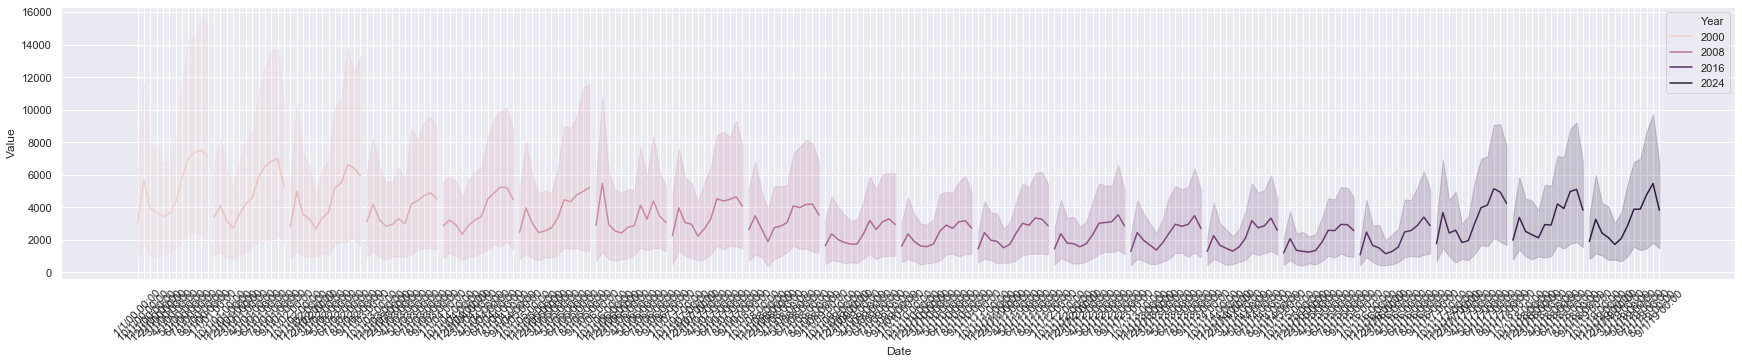

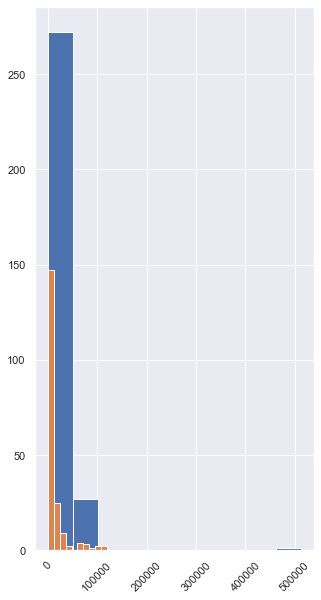

In [40]:
dfcan00and19bp = dfbc.loc[(dfbc['Year'].isin([2000, 2019])) & (dfbc['Border'] == 'US-Canada Border') & (dfbc['Measure'] == 'Bus Passengers')]


dfmexbp = dfbc.loc[(dfbc['Year'] > 1999) & (dfbc['Year'] < 2020) & (dfbc['Border'] == 'US-Mexico Border') & (dfbc['Measure'] == 'Bus Passengers')]
dfcanbp = dfbc.loc[(dfbc['Year'] > 1999) & (dfbc['Year'] < 2020) & (dfbc['Border'] == 'US-Canada Border') & (dfbc['Measure'] == 'Bus Passengers')]

plt.figure(figsize=(30,5))
plt.xticks(rotation=45)
sns.lineplot('Date', 'Value', hue = 'Year', data = dfcanbp)
#sns.lineplot('Date', 'Value', hue = 'Year', data = dfcanvp)

dfcan00and19bp = dfbc.loc[(dfbc['Year'].isin([2000, 2019])) & (dfbc['Border'] == 'US-Mexico Border') & (dfbc['Measure'] == 'Bus Passengers')]

canbp2000 = dfcan00and19bp.loc[(dfcan00and19bp['Year']== 2000),'Value']
canbp2019 = dfcan00and19bp.loc[(dfcan00and19bp['Year']== 2019),'Value']

plt.figure(figsize=(5,10))
plt.xticks(rotation=45)
#
plt.hist(canbp2000)
plt.hist(canbp2019)

stats.kruskal(canbp2000,canbp2019)

In [41]:
stats.kruskal(mexvp2000,mexvp2019)

KruskalResult(statistic=22.393043606131037, pvalue=2.2217728178475878e-06)

In [42]:
stats.kruskal(mexvp2000,mexvp2019)

KruskalResult(statistic=22.393043606131037, pvalue=2.2217728178475878e-06)

(array([930.,  29.,   4.,  12.,  13.,   8.,   2.,   0.,   0.,   2.]),
 array([7.0000000e+00, 1.4539970e+05, 2.9079240e+05, 4.3618510e+05,
        5.8157780e+05, 7.2697050e+05, 8.7236320e+05, 1.0177559e+06,
        1.1631486e+06, 1.3085413e+06, 1.4539340e+06]),
 <a list of 10 Patch objects>)

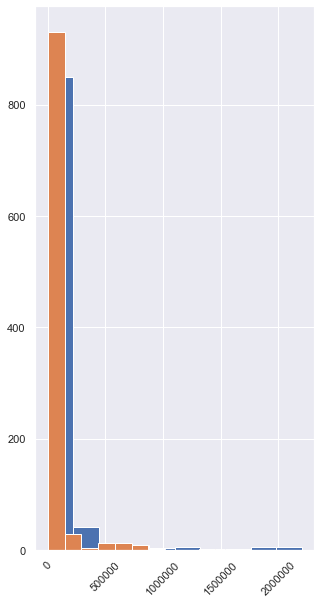

In [43]:
dfcan00and19vp = dfbc.loc[(dfbc['Year'].isin([2000, 2019])) & (dfbc['Border'] == 'US-Canada Border') & (dfbc['Measure'] == 'Personal Vehicle Passengers')]

canvp2000 = dfcan00and19vp.loc[(dfcan00and19vp['Year']== 2000),'Value']
canvp2019 = dfcan00and19vp.loc[(dfcan00and19vp['Year']== 2019),'Value']

plt.figure(figsize=(5,10))
plt.xticks(rotation=45)
#
plt.hist(canvp2000)
plt.hist(canvp2019)

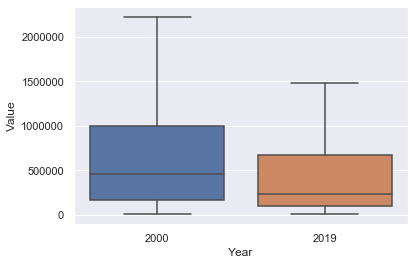

In [62]:
sns.boxplot('Year', 'Value', data = dfmex00and19vp, showfliers =False)

In [ ]:
plt.hist(mexvp2000cl)
plt.hist(mexvp2019cl)

In [ ]:
stats.ttest_ind(mexvp2000cl,mexvp2019cl)

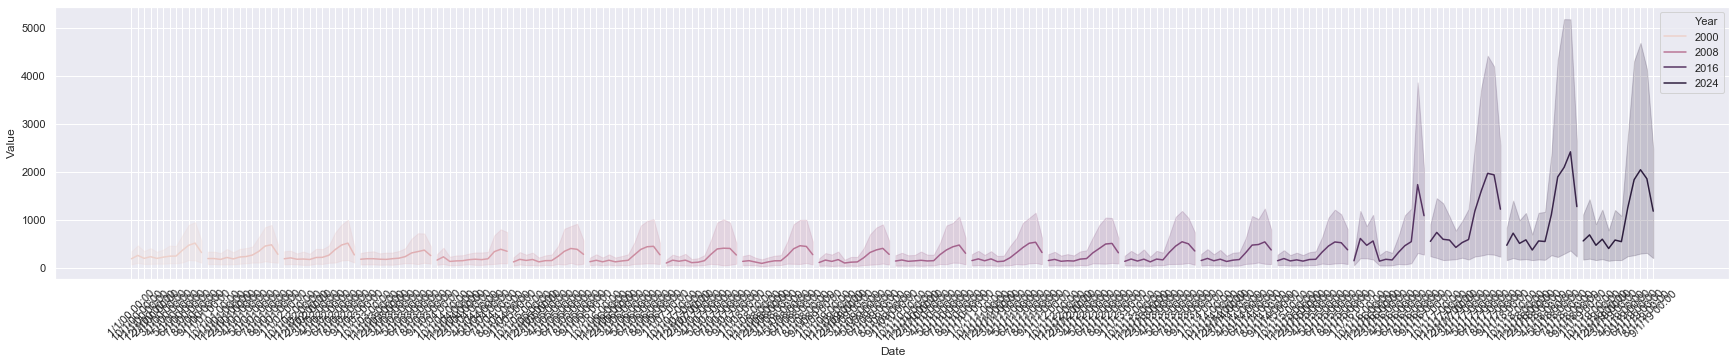

In [64]:
dfmextp = dfbc.loc[(dfbc['Year'] > 1999) & (dfbc['Year'] < 2020) & (dfbc['Border'] == 'US-Mexico Border') & (dfbc['Measure'] == 'Train Passengers')]
dfcantp = dfbc.loc[(dfbc['Year'] > 1999) & (dfbc['Year'] < 2020) & (dfbc['Border'] == 'US-Canada Border') & (dfbc['Measure'] == 'Train Passengers')]
plt.figure(figsize=(30,5))
plt.xticks(rotation=45)

sns.lineplot('Date', 'Value', hue = 'Year', data = dfcantp)

(array([24.,  0.,  5.,  7.,  0.,  0.,  0.,  2.,  5.,  4.]),
 array([ 17. ,  82.3, 147.6, 212.9, 278.2, 343.5, 408.8, 474.1, 539.4,
        604.7, 670. ]),
 <a list of 10 Patch objects>)

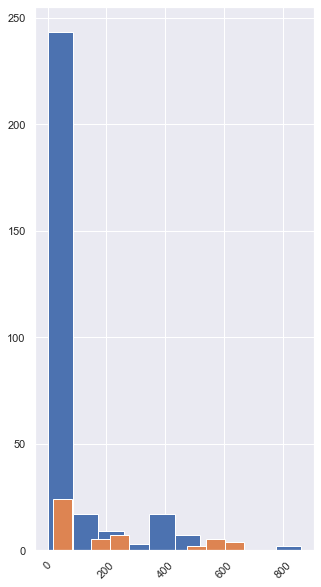

In [66]:
# Initial analysis of average causes of deaths over the 10 years (2008-2018)
# plt.hist(dfbc.loc[dfbc['Year'] == 2000, 'Value'], bins = 10)
# x = dfbc.loc[(dfbc['Measure'] == 'Pedestrians') & (dfbc['Year'] == 2019) & (dfbc['Border'] == 'US-Mexico Border'), 'Value'] 
# plt.hist(x, bins = 50)
dfmex00and18tp = dfbc.loc[(dfbc['Year'].isin([2000, 2019])) & (dfbc['Border'] == 'US-Mexico Border') & (dfbc['Measure'] == 'Train Passengers')]
dfmex00and18tp
mextp2000 = dfmex00and18tp.loc[(dfmex00and18tp['Year']== 2000),'Value']
mextp2019 = dfmex00and18tp.loc[(dfmex00and18tp['Year']== 2019),'Value']

plt.figure(figsize=(5,10))
plt.xticks(rotation=45)
#
plt.hist(mextp2000)
plt.hist(mextp2019)

#sns.lineplot(, 'Value', data = dfbc)
#dfbc.loc[(dfbc['Measure'] == 'Trucks') & (dfbc['Year'] == 2020)].mean()
#plt.hist(dfbc.loc[dfbc['Year'] == 2000 & dfbc['Measure'] == 'Trains','Value'], bins = 10, data = dfbc)

(array([  4.,  11.,  42.,  77.,  90., 126.,  66.,  48.,  21.,  15.]),
 array([134.3       , 147.43666667, 160.57333333, 173.71      ,
        186.84666667, 199.98333333, 213.12      , 226.25666667,
        239.39333333, 252.53      , 265.66666667]),
 <a list of 10 Patch objects>)

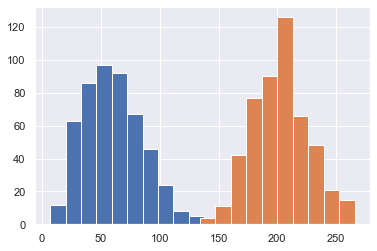

In [78]:

dist00 = []
for _ in range(500):
    samplemean = np.random.choice(mextp2000,30, replace=False)
    dist00.append(samplemean.mean())
mextp2000cl = pd.DataFrame({'means': dist00})

dist19 = []
for _ in range(500):
    samplemean = np.random.choice(mextp2019,30, replace=False)
    dist19.append(samplemean.mean())
mextp2019cl = pd.DataFrame({'means': dist19})



plt.hist(mextp2000cl['means'])

plt.hist(mextp2019cl['means'])

In [81]:
def get_95_ci(col1, col2):
  x1n = col1.shape[0]
  x2n = col2.shape[0]
  
  x1 = np.mean(col1)
  x2 = np.mean(col2)
  x1_var = col1.var()
  x2_var = col2.var()
  mean_difference = x2 - x1
  std_err_difference = math.sqrt((x1_var/x1n)+(x1_var/x2n))
  margin_of_error = 1.96 * std_err_difference
  ci_lower = mean_difference - margin_of_error
  ci_upper = mean_difference + margin_of_error
  return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(mextp2000cl['means'],mextp2019cl['means'])




'The difference in means at the 95% confidence interval (two-tail) is between 136.56917343644625 and 143.08815989688708.'

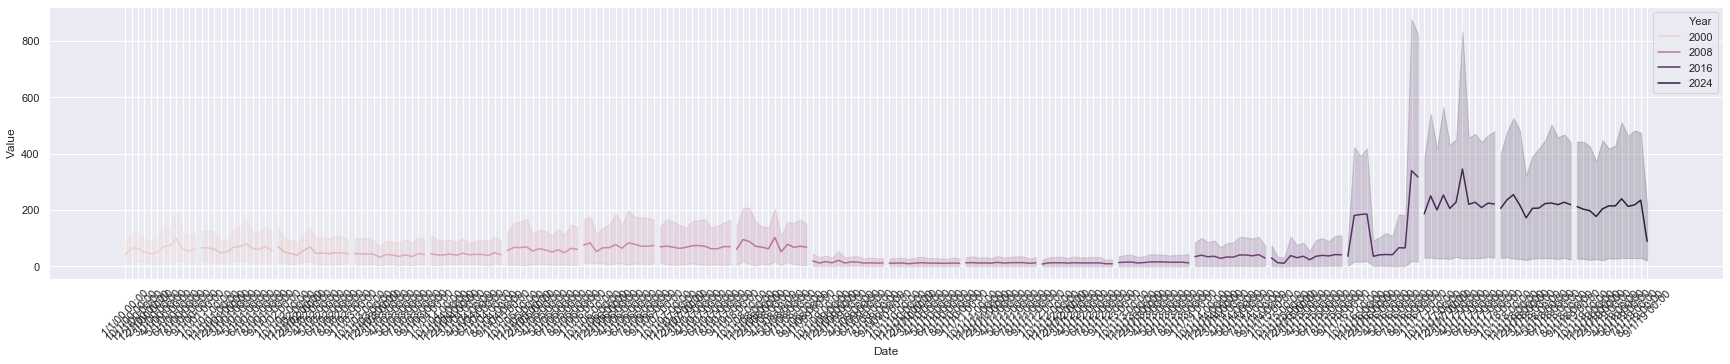

In [68]:
plt.figure(figsize=(30,5))
plt.xticks(rotation=45)
sns.lineplot('Date', 'Value', hue = 'Year', data = dfmextp)

In [ ]:
stats.kruskal(mextp2000,mextp2019)

In [ ]:
dfcan00and18tp = dfbc.loc[(dfbc['Year'].isin([2000, 2019])) & (dfbc['Border'] == 'US-Canda Border') & (dfbc['Measure'] == 'Train Passengers')]
dfcan00and18tp
cantp2000 = dfcan00and18tp.loc[(dfcan00and18tp['Year']== 2000),'Value']
cantp2019 = dfcan00and18tp.loc[(dfcan00and18tp['Year']== 2019),'Value']

stats.kruskal(cantp2000,cantp2019)

In [79]:
dist00 = []
for _ in range(500):
    samplemean = np.random.choice(mextp2000,30, replace=False)
    dist00.append(samplemean.mean())
mextp2000cl = pd.DataFrame({'means': dist00})

dist19 = []
for _ in range(500):
    samplemean = np.random.choice(mextp2019,30, replace=False)
    dist19.append(samplemean.mean())
mextp2019cl = pd.DataFrame({'means': dist19})


get_95_ci(mextp2000cl['means'],mextp2019cl['means'])


'The difference in means at the 95% confidence interval (two-tail) is between 136.56917343644625 and 143.08815989688708.'

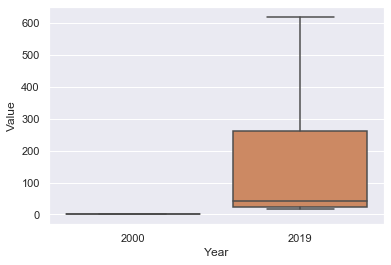

In [80]:
sns.boxplot('Year', 'Value', data = dfmex00and18tp, showfliers = False)

# Analysis

In [ ]:
sns.boxplot('Year', 'Value', data = dfmex00and18tp, showfliers = False)